|  Surname | Name   | Matricola   | Accademic Mail   |
|---|---|---|---|
|Rossetto   | Eric     | 982594  | eric.rossetto@studio.unibo.it |
|Wen          | Xiaowei   | 982501  | xiaowei.wen@studio.unibo.it  |  


MSc student in Artificial Intelligence
@ Alma Mater Studiorum, University of Bologna
August, 2021

# Importing libraries

In [1]:
from z3 import *
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as mpatches
import time
import json

# Defining functions 

In [2]:
from tools import *

# Defining function for SMT instance

In [3]:
def vlsi_instance(W, H, dims, width, max_height, time_out = 300):
  """
    Variable declaration
    W: width of all circuits
    H: height of all circuits
    dims: number of circuits
    width: width of the board/ solution
    max_height: maximum height reachable by stacking all circuits. 
    time_out: timeout for the solver in seconds
  """
  # decision variable for the height
  all_constraints = []
  height = Int('height')

  # X component of the solution where to place the circuits
  X = [Int(f"X_{i}") for i in range(dims)]
  
  # Y component of the solution where to place the circuits
  Y = [Int(f"Y_{i}") for i in range(dims)]

  # width boundaries constraints
  boundaries_c_width = [And(0 <= X[i], W[i]+ X[i]<= width) for i in range(dims)]
  all_constraints+= boundaries_c_width


  # height boundaries constraints
  boundaries_c_height = [0 <= Y[i] for i in range(dims)] #+ np.max([Y[i]+H[i]for i in range(dims)], dtype= int)< height
  all_constraints += boundaries_c_height

  biggest = int(np.argmax(np.array(W)*np.array(H)))
  # symmetry breaking 
  all_constraints +=  [And(X[biggest] == 0, Y[biggest] == 0)]

  # height constraints
  height_constraint = [Y[i]+H[i]<=height for i in range(dims)]
  all_constraints += height_constraint

  # no overlapping constraints
  no_overlapping = []    
  for i in range(dims):
    for j in range(dims): # to fix
      if i != j:
        no_overlapping.append(
                Or(X[i] + W[i] <= X[j],
                Y[i] + H[i] <= Y[j],
                X[i] - W[j] >= X[j],
                Y[i] - H[j] >= Y[j])) 
  all_constraints += no_overlapping

  """
    Solving phase
  """
  solver = Optimize()
  # print(str(all_constraints))
  solver.add(all_constraints)
  # minimizing function
  if time_out!= -1:
    solver.set("timeout",time_out*1000)
  solver.minimize(height)
  if solver.check() == sat:
    m = solver.model()
    return int(m.evaluate(height).as_string()), [int(m.evaluate(X[i]).as_string()) for i in range(dims)],[int(m.evaluate(Y[i]).as_string()) for i in range(dims)]
  else:
    print(solver.reason_unknown())
    return None



# Solving
## reading solution time per instance

In [4]:
time_table = "time_no_rot_sym.json"
time_per_instance = []
with open(time_table, "r") as f:
    time_json = json.load(f)

## Getting instances 

In [5]:
path = "../../instances/"
# solve all instances in path
instances = os.listdir(path)

# solve a certain range of the instances
# instances = [f"ins-{i}.txt" for i in range (27,41)]

# solve a specific instance
# instances = [f"ins-{11}.txt"]

# solve those unsolved instances
# instances = []
# for key, value in time_json.items():
#   if value == -1:
#     instances.append(key)

    

## Solving instances

Instance 1:
(8, [5, 5, 0, 0], [0, 3, 5, 0])
Solution (width, height): (8, 8), time: 0.1406s


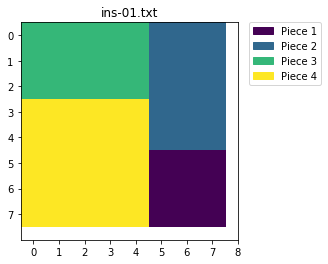

Instance 2:
(9, [6, 3, 3, 6, 0], [6, 5, 0, 0, 0])
Solution (width, height): (9, 9), time: 0.0369s


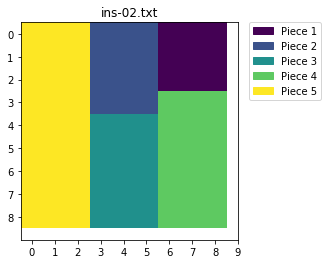

Instance 3:
(10, [7, 4, 4, 7, 0, 0], [0, 0, 4, 3, 6, 0])
Solution (width, height): (10, 10), time: 0.1137s


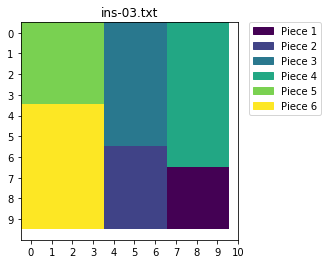

Instance 4:
(11, [0, 5, 8, 8, 3, 0, 0], [8, 4, 0, 5, 8, 4, 0])
Solution (width, height): (11, 11), time: 0.085s


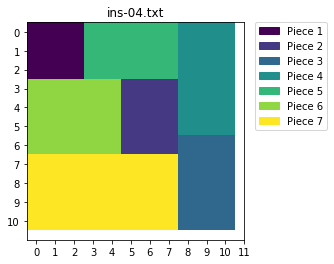

Instance 5:
(12, [3, 9, 6, 3, 6, 9, 0, 0], [0, 0, 7, 3, 0, 4, 0, 9])
Solution (width, height): (12, 12), time: 0.1027s


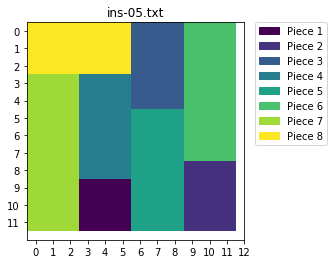

Instance 6:
(13, [10, 10, 7, 10, 4, 7, 0, 0, 0], [10, 0, 8, 4, 6, 0, 6, 9, 0])
Solution (width, height): (13, 13), time: 0.1686s


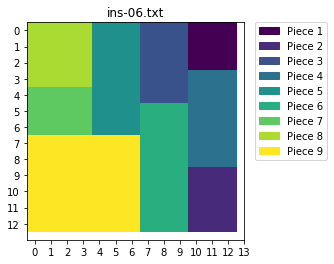

Instance 7:
(14, [8, 8, 5, 11, 8, 11, 5, 0, 0], [0, 10, 9, 8, 3, 0, 0, 10, 0])
Solution (width, height): (14, 14), time: 0.2084s


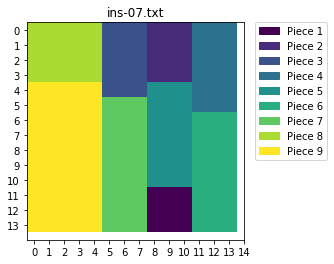

Instance 8:
(15, [9, 9, 9, 12, 3, 3, 12, 6, 0, 6], [3, 11, 6, 9, 8, 0, 0, 3, 0, 0])
Solution (width, height): (15, 15), time: 0.1556s


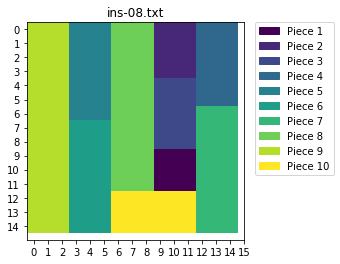

Instance 9:
(16, [13, 7, 13, 10, 4, 13, 10, 7, 0, 0], [8, 0, 11, 10, 9, 0, 0, 4, 9, 0])
Solution (width, height): (16, 16), time: 0.1676s


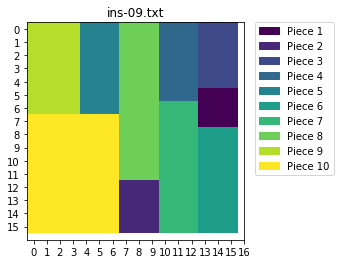

Instance 10:
(17, [11, 11, 4, 4, 11, 14, 14, 0, 7, 0, 7, 4], [11, 0, 12, 6, 4, 0, 8, 14, 6, 0, 14, 0])
Solution (width, height): (17, 17), time: 0.4657s


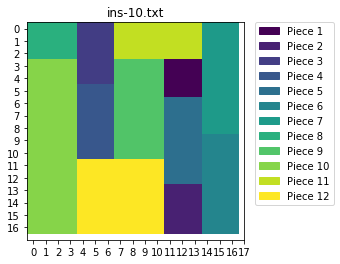

Instance 11:
canceled
Instance 12:
(19, [13, 3, 13, 6, 3, 7, 16, 16, 13, 10, 0, 6, 9, 3], [11, 8, 14, 13, 12, 0, 10, 0, 0, 0, 0, 8, 13, 0])
Solution (width, height): (19, 19), time: 1.544s


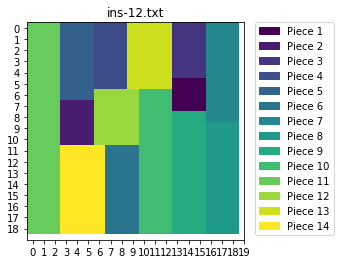

Instance 13:
(20, [14, 8, 17, 8, 17, 17, 11, 8, 11, 14, 0, 4, 4, 0], [0, 6, 15, 0, 8, 0, 0, 10, 9, 3, 17, 0, 9, 0])
Solution (width, height): (20, 20), time: 1.5525s


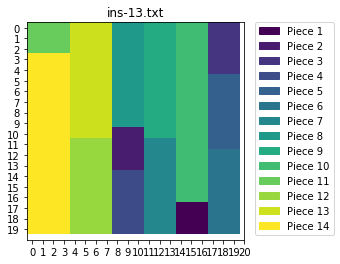

Instance 14:
(21, [18, 9, 12, 12, 15, 9, 9, 12, 15, 18, 5, 0, 5, 4, 0], [18, 17, 6, 0, 0, 9, 0, 11, 7, 0, 11, 15, 0, 15, 0])
Solution (width, height): (21, 21), time: 2.4911s


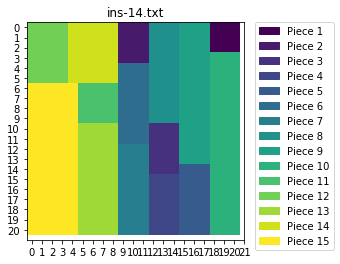

Instance 15:
(22, [13, 13, 16, 16, 16, 10, 19, 4, 13, 4, 19, 10, 7, 0, 0, 13], [15, 18, 4, 9, 15, 14, 0, 0, 4, 10, 9, 0, 0, 19, 0, 0])
Solution (width, height): (22, 22), time: 1.969s


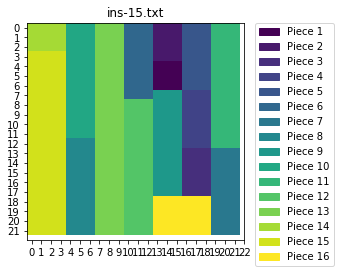

Instance 16:
canceled
Instance 17:
(24, [21, 5, 18, 12, 21, 0, 18, 18, 9, 21, 12, 15, 5, 5, 5, 8, 3, 0], [14, 12, 10, 18, 17, 16, 15, 0, 0, 0, 0, 0, 4, 0, 7, 12, 16, 0])
Solution (width, height): (24, 24), time: 37.2948s


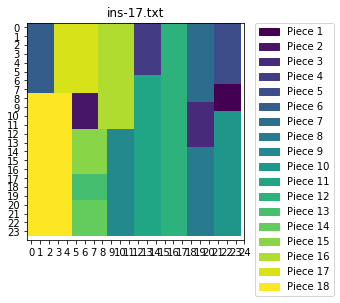

Instance 18:
(25, [22, 6, 3, 9, 3, 19, 22, 3, 16, 22, 16, 19, 6, 9, 0, 12, 12, 12, 3], [13, 21, 10, 19, 3, 17, 16, 15, 0, 0, 11, 0, 3, 0, 0, 13, 18, 0, 0])
Solution (width, height): (25, 25), time: 11.344s


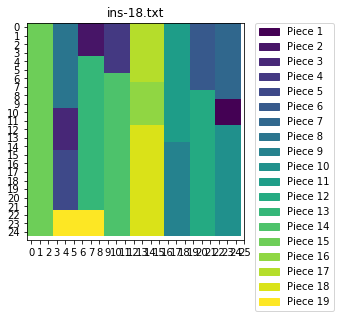

Instance 19:
canceled
Instance 20:
(27, [7, 4, 7, 24, 10, 21, 17, 17, 4, 4, 7, 14, 24, 0, 0, 10, 13, 17, 10, 20, 0], [0, 23, 22, 0, 0, 19, 10, 0, 12, 0, 3, 7, 6, 24, 20, 21, 0, 19, 7, 0, 0])
Solution (width, height): (27, 27), time: 242.9485s


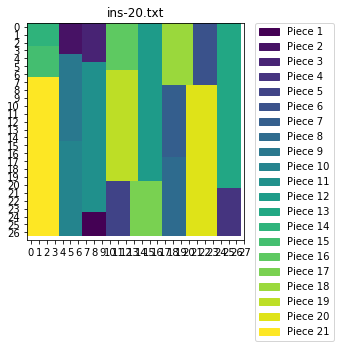

Instance 21:
canceled
Instance 22:
canceled
Instance 23:
(30, [17, 11, 23, 14, 11, 14, 11, 11, 20, 17, 17, 14, 20, 23, 26, 26, 26, 26, 26, 0], [0, 9, 25, 16, 13, 22, 0, 20, 19, 3, 16, 0, 0, 0, 23, 26, 17, 0, 8, 0])
Solution (width, height): (30, 30), time: 54.4419s


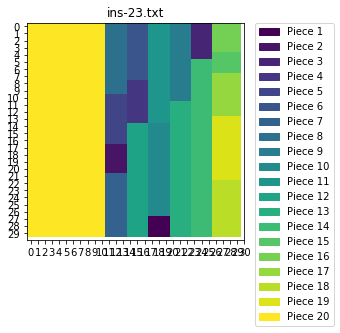

Instance 24:
(31, [28, 18, 12, 12, 28, 12, 15, 28, 28, 12, 22, 18, 15, 25, 21, 21, 21, 18, 0], [11, 27, 0, 25, 24, 5, 0, 14, 0, 13, 0, 13, 9, 0, 21, 24, 13, 0, 0])
Solution (width, height): (31, 31), time: 15.8101s


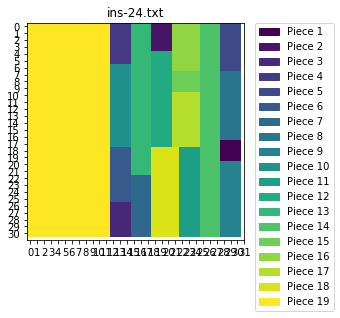

Instance 25:
canceled
Instance 26:
canceled
Instance 27:
(34, [24, 28, 12, 24, 12, 18, 21, 31, 31, 18, 31, 18, 28, 12, 21, 15, 27, 27, 24, 24, 0], [25, 0, 0, 28, 5, 14, 0, 24, 13, 22, 0, 0, 4, 12, 9, 0, 25, 29, 14, 0, 0])
Solution (width, height): (34, 34), time: 51.2868s


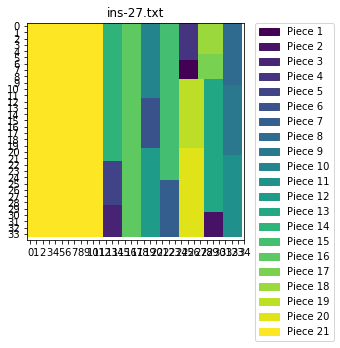

Instance 28:
(35, [21, 24, 24, 24, 14, 24, 14, 21, 24, 14, 21, 17, 17, 17, 17, 31, 31, 27, 17, 31, 27, 0], [10, 0, 30, 12, 28, 4, 0, 0, 18, 9, 13, 32, 11, 0, 5, 8, 0, 0, 15, 15, 12, 0])
Solution (width, height): (35, 35), time: 34.0354s


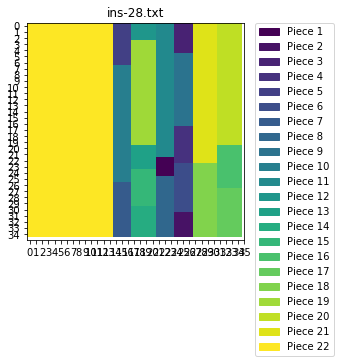

Instance 29:
(36, [33, 12, 12, 15, 15, 15, 33, 33, 12, 18, 33, 15, 12, 18, 25, 21, 21, 21, 28, 28, 28, 28, 0], [10, 0, 31, 0, 29, 21, 13, 0, 4, 0, 22, 6, 15, 12, 0, 33, 0, 11, 33, 15, 19, 0, 0])
Solution (width, height): (36, 36), time: 180.9363s


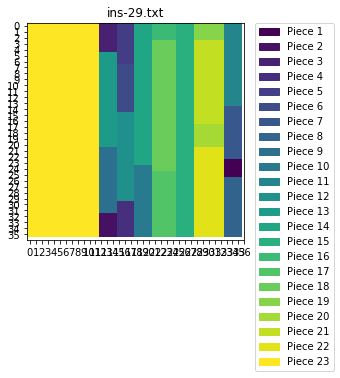

Instance 30:
canceled
Instance 31:
(38, [24, 24, 28, 35, 24, 24, 35, 35, 28, 35, 27, 31, 31, 27, 27, 31, 31, 24, 0], [31, 34, 19, 9, 24, 0, 0, 15, 8, 25, 35, 6, 0, 0, 24, 26, 11, 8, 0])
Solution (width, height): (38, 38), time: 20.743s


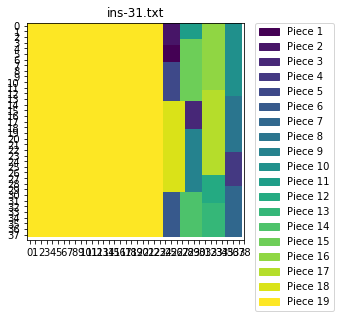

Instance 32:
canceled
Instance 33:
(40, [29, 34, 22, 29, 29, 29, 22, 22, 34, 22, 37, 25, 25, 25, 29, 32, 32, 32, 29, 0], [7, 28, 0, 10, 0, 32, 31, 21, 16, 5, 0, 36, 22, 0, 16, 0, 32, 4, 19, 0])
Solution (width, height): (40, 40), time: 50.2255s


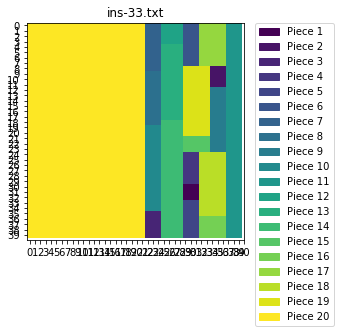

Instance 34:
canceled
Instance 35:
canceled
Instance 36:
canceled
Instance 37:
canceled
Instance 38:
canceled
Instance 39:
canceled
Instance 40:
canceled


In [6]:

for i in range(len(instances)):
    # print(path+instance)
    instance = instances[i]
    print(f"Instance {i+1}:")
    width, W, H = read_instance_text(path + instance)
    # print(dims)
    max_height = np.sum([H[i] for i in range(len(H))], dtype=int)
    # print(f"Maximum height reachable: {max_height}")

    start_time = time.time_ns()
    returned_value = vlsi_instance(W, H, len(W), width, max_height)
    if returned_value is not None:
        print(returned_value)
        height, X, Y = returned_value
        end_time = time.time_ns()
        end_time = (end_time - start_time) / 10 ** 9
        print(f"Solution (width, height): {width, height}, time: {round(end_time, 4)}s")
        time_json[instance] = end_time

        # showing solutions
        solutions = dims_sol_unify(W, H, X, Y)
        save_sol("rot_no_sym_sol/" + instance.replace("ins", "sol"), width, height, W, H, X, Y)
        arr = draw_solution((width, height), solutions)
        show_shape(arr, instance, len(W))
    else:
        time_json[instance] = -1


## Saving time table

In [7]:
with open(time_table, "w") as outfile:
    data = json.dumps(time_json, indent=4, sort_keys=True)
    outfile.write(data)

## Performance Analysis

In [8]:
acc = 0
counter = 0
for k,v in time_json.items():
    if v != -1:
        acc +=v
        counter+=1

print(f"Number of successfully solved instances: {counter}")
print(f"Average time per instance: {np.round(acc/counter,decimals=2)}/s")



Number of successfully solved instances: 24
Average time per instance: 29.51/s
